<a href="https://colab.research.google.com/github/Pranayshukla0610/Natural-Language-Processing-NLP-/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/Sheet_1 (1).csv')
df

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
75,response_76,not_flagged,"Now that I've been through it, although i'm no...",NaN,NaN,NaN,NaN,NaN
76,response_77,flagged,when my best friends mom past away from od'ing...,NaN,NaN,NaN,NaN,NaN
77,response_78,not_flagged,As a camp counselor I provide stability in kid...,NaN,NaN,NaN,NaN,NaN
78,response_79,flagged,My now girlfriend used to have serious addicti...,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(80, 8)

#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   response_id    80 non-null     object 
 1   class          80 non-null     object 
 2   response_text  80 non-null     object 
 3   Unnamed: 3     2 non-null      object 
 4   Unnamed: 4     0 non-null      float64
 5   Unnamed: 5     1 non-null      object 
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     1 non-null      object 
dtypes: float64(2), object(6)
memory usage: 5.1+ KB


In [ ]:
df.describe()

,Unnamed: 4,Unnamed: 6
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [ ]:
df.dtypes

,0
response_id,object
class,object
response_text,object
Unnamed: 3,object
Unnamed: 4,float64
Unnamed: 5,object
Unnamed: 6,float64
Unnamed: 7,object


In [ ]:
df.columns

Index(['response_id', 'class', 'response_text', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
response_id,0
class,0
response_text,0
Unnamed: 3,78
Unnamed: 4,80
Unnamed: 5,79
Unnamed: 6,80
Unnamed: 7,79


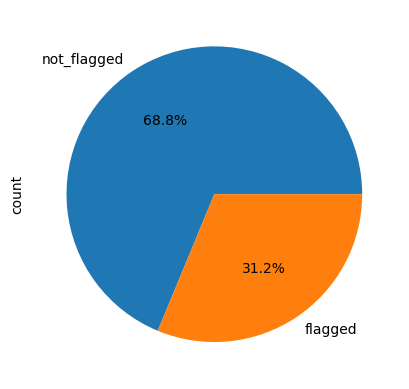

In [ ]:
df['class'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.show()

#NATURAL LANGUAGE PROCESSING
##TEXT PREPROCESSING

In [ ]:
data = df[['class','response_text']]
data.head()

,class,response_text
0,not_flagged,I try and avoid this sort of conflict
1,flagged,Had a friend open up to me about his mental ad...
2,flagged,I saved a girl from suicide once. She was goin...
3,not_flagged,i cant think of one really...i think i may hav...
4,not_flagged,Only really one friend who doesn't fit into th...


In [ ]:
data['class'] = data.loc[:,'class'].map({'not_flagged':0, 'flagged':1})
data.head()

,class,response_text
0,0,I try and avoid this sort of conflict
1,1,Had a friend open up to me about his mental ad...
2,1,I saved a girl from suicide once. She was goin...
3,0,i cant think of one really...i think i may hav...
4,0,Only really one friend who doesn't fit into th...


In [ ]:
data.response_text[1]

'Had a friend open up to me about his mental addiction to weed and how it was taking over his life and making him depressed'

##Regular Expression


In [ ]:
text_1 = data.response_text[1]
text = re.sub(r"[^a-zA-Z0-9]", " ", text_1)
text = text.lower()

In [ ]:
print(text)

had a friend open up to me about his mental addiction to weed and how it was taking over his life and making him depressed


##Tokeniztion

In [ ]:
token = text.split()
token

['had',
 'a',
 'friend',
 'open',
 'up',
 'to',
 'me',
 'about',
 'his',
 'mental',
 'addiction',
 'to',
 'weed',
 'and',
 'how',
 'it',
 'was',
 'taking',
 'over',
 'his',
 'life',
 'and',
 'making',
 'him',
 'depressed']

##Removal of Irrelevant Words (STOPWORDS)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text = nltk.word_tokenize(text)
text = [word for word in text if not word in set(stopwords.words("english"))]
print(text)

['friend', 'open', 'mental', 'addiction', 'weed', 'taking', 'life', 'making', 'depressed']


##Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

text = [
    lemmatizer.lemmatize(
        lemmatizer.lemmatize(
            lemmatizer.lemmatize(word, pos="n"),
            pos="v"
        ),
        pos="a"
    )
    for word in text
]

print(text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['friend', 'open', 'mental', 'addiction', 'weed', 'take', 'life', 'make', 'depress']


##All Words

In [ ]:
description_list = []
for description in data.response_text:
  description = re.sub(r"[^a-zA-Z]"," ",description)
  description = description.lower()

  description = nltk.word_tokenize(description)
  description = [word for word in description if not word in set(stopwords.words('english'))]

  lemmatizer = WordNetLemmatizer()
  description = [(lemmatizer.lemmatize(lemmatizer.lemmatize(lemmatizer.lemmatize(word,"n"),pos="v"),pos="a"))for word in description]

  description = " ".join(description)
  description_list.append(description)

In [ ]:
description_list[1]

'friend open mental addiction weed take life make depress'

##Text Representation (BAG OF WORDS)

In [ ]:
max_features = 100
count_vectorizer = CountVectorizer(max_features=max_features)

space_matrix = count_vectorizer.fit_transform(description_list).toarray()

top_words = count_vectorizer.get_feature_names_out()

print("Top 100 most used words: {}".format(top_words))

Top 100 most used words: ['addiction' 'advice' 'always' 'anxiety' 'anything' 'ask' 'back' 'best'
 'bring' 'call' 'camp' 'care' 'come' 'comfort' 'could' 'deal' 'depression'
 'describe' 'dont' 'end' 'even' 'everything' 'experience' 'face' 'feel'
 'find' 'friend' 'get' 'gf' 'girl' 'girlfriend' 'give' 'go' 'good' 'grade'
 'happen' 'help' 'helpful' 'issue' 'kid' 'kill' 'know' 'last' 'let' 'life'
 'like' 'listen' 'little' 'look' 'lot' 'make' 'many' 'may' 'much' 'need'
 'never' 'night' 'offer' 'often' 'one' 'open' 'others' 'people' 'person'
 'personal' 'problem' 'really' 'say' 'school' 'see' 'self' 'severe'
 'share' 'shit' 'similar' 'simply' 'situation' 'someone' 'sometimes'
 'start' 'struggle' 'stuff' 'suicide' 'support' 'take' 'talk' 'tell'
 'think' 'though' 'time' 'tough' 'trouble' 'try' 'use' 'want' 'way' 'well'
 'work' 'would' 'year']


#NAIVE BAYES CLASSIFICATION

In [ ]:
X = space_matrix
y = data.iloc[:,0].values

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_pred,y_test))

Accuracy:  0.8


In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Conv1D, MaxPooling1D, Flatten, Bidirectional
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
accuracy_nb = nb.score(X_test, y_test)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_nb:.2f}")

Gaussian Naive Bayes Accuracy: 0.80


In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
accuracy_svm = svm.score(X_test, y_test)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.70


In [ ]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1)))  # Assuming 1D input
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(np.expand_dims(X_train, axis=-1), y_train, epochs=10, batch_size=32, verbose=0)
accuracy_lstm = lstm_model.evaluate(np.expand_dims(X_test, axis=-1), y_test)[1]
print(f"LSTM Model Accuracy: {accuracy_lstm:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.8000 - loss: 0.5109
LSTM Model Accuracy: 0.80


In [ ]:
#CNN
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(np.expand_dims(X_train, axis=-1), y_train, epochs=10, batch_size=32, verbose=0)
accuracy_cnn = cnn_model.evaluate(np.expand_dims(X_test, axis=-1), y_test)[1]
print(f"CNN Model Accuracy: {accuracy_cnn:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.7000 - loss: 0.6592
CNN Model Accuracy: 0.70


In [ ]:
# CNN-BiLSTM Model
cnn_bilstm_model = Sequential()
cnn_bilstm_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_bilstm_model.add(MaxPooling1D(pool_size=2))
cnn_bilstm_model.add(Bidirectional(LSTM(64)))
cnn_bilstm_model.add(Dense(1, activation='sigmoid'))
cnn_bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_bilstm_model.fit(np.expand_dims(X_train, axis=-1), y_train, epochs=10, batch_size=32, verbose=0)
accuracy_cnn_bilstm = cnn_bilstm_model.evaluate(np.expand_dims(X_test, axis=-1), y_test)[1]
print(f"CNN-BiLSTM Model Accuracy: {accuracy_cnn_bilstm:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.7000 - loss: 0.5845
CNN-BiLSTM Model Accuracy: 0.70


In [ ]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
accuracy_logreg = logreg.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")


Logistic Regression Accuracy: 0.75


In [ ]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
accuracy_rf = rf.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.70


In [ ]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
accuracy_dt = dt.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.70
